In [376]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [377]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train = df_train.drop(['motor_volume','wheel','type','color', 'model', 'motor_type', 'status'], axis=1)
df_test = df_test.drop(['motor_volume','wheel','type','color', 'model', 'motor_type', 'status'], axis=1)

In [378]:
from sklearn.preprocessing import LabelEncoder

In [379]:
label = LabelEncoder()

In [380]:
df_train['running'] = df_train['running'].apply(lambda x: int(x.split(' ')[0]) if x.split(' ')[1] == 'km' else int(x.split(' ')[0]) * 1.6)
df_test['running'] = df_test['running'].apply(lambda x: int(x.split(' ')[0]) if x.split(' ')[1] == 'km' else int(x.split(' ')[0]) * 1.6)


In [381]:
X = df_train.drop('price', axis=1)
y = df_train['price']

In [382]:
from sklearn.preprocessing import StandardScaler

In [383]:
scaler = StandardScaler()

In [384]:
df_test = df_test.drop('Id', axis=1)

In [385]:
df_test

,year,running
0,2020,38400.0
1,2017,136000.0
2,2021,48000.0
3,2018,84800.0
4,2003,368000.0
...,...,...
406,2021,53440.0
407,2017,96000.0
408,2012,348800.0
409,2020,64000.0


In [386]:
X = scaler.fit_transform(X)
df_test = scaler.transform(df_test)

In [387]:
df_test

array([[ 7.88736279e-01, -8.44183617e-01],
       [ 3.33194608e-01, -1.63401444e-01],
       [ 9.40583503e-01, -7.77221436e-01],
       [ 4.85041832e-01, -5.20533076e-01],
       [-1.79266652e+00,  1.45485126e+00],
       [ 9.40583503e-01, -9.33466524e-01],
       [-2.55190264e+00,  1.41020981e+00],
       [-2.09636097e+00,  3.94616730e-01],
       [ 3.33194608e-01,  7.27273684e-01],
       [ 6.36889055e-01, -4.08929441e-01],
       [ 6.36889055e-01, -2.75005079e-01],
       [-3.00744431e+00,  3.35211305e+00],
       [ 3.33194608e-01, -1.74561808e-01],
       [-4.26041510e-01, -1.85722171e-01],
       [ 3.33194608e-01,  9.32869160e-02],
       [-2.74194286e-01,  4.55998729e-01],
       [ 4.85041832e-01, -2.75005079e-01],
       [ 1.81347385e-01, -4.75891622e-01],
       [ 4.85041832e-01, -2.97325806e-01],
       [-1.22347063e-01, -1.83167189e-02],
       [-2.70374986e+00,  1.45485126e+00],
       [-3.00744431e+00,  2.18027489e+00],
       [ 4.85041832e-01,  8.07550179e-01],
       [ 7.

In [388]:
X

array([[ 1.09243073, -1.07855125],
       [-0.12234706,  0.36113564],
       [ 0.48504183, -0.05179781],
       ...,
       [ 0.48504183, -0.3430833 ],
       [ 0.63688906, -0.76606107],
       [ 1.09243073, -1.11180913]])

In [389]:
from sklearn.linear_model import LinearRegression

In [390]:
model = LinearRegression()

In [391]:
model.fit(X, y)

LinearRegression()

In [392]:
y_pred = model.predict(df_test)

In [393]:
submit = pd.read_csv('sample_submission.csv')

In [394]:
submit['price'] = y_pred

In [395]:
submit.to_csv('team.csv', index=False, index_label=False)

In [396]:
submit

,Id,price
0,0,19727.712523
1,1,17463.986100
2,2,20329.085100
3,3,18286.436276
4,4,7712.486602
...,...,...
406,406,20309.304472
407,407,17609.431890
408,408,13508.816672
409,409,19634.627218


In [326]:
X

array([[ 1.52639053,  1.09243073,  0.26699337, -1.07855125, -0.45353122],
       [ 0.05769246, -0.12234706,  0.26699337,  0.36113564, -0.45353122],
       [-0.67665657,  0.48504183,  0.26699337, -0.05179781, -0.45353122],
       ...,
       [ 0.79204149,  0.48504183,  0.26699337, -0.3430833 ,  0.97583205],
       [ 0.79204149,  0.63688906,  0.26699337, -0.76606107, -0.45353122],
       [ 1.52639053,  1.09243073,  0.26699337, -1.11180913, -0.45353122]])

# Outliers

<Axes: xlabel='running'>

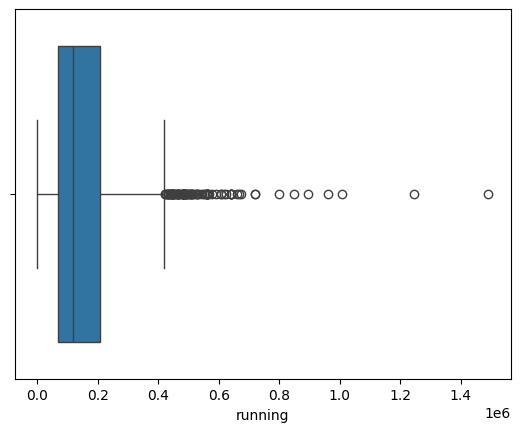

In [334]:
sns.boxplot(x=df_train['running'])

In [333]:
df_train

,model,year,motor_type,running,status,price
0,4,2022,3,4800.0,1,24500
1,2,2014,3,211200.0,1,25500
2,1,2018,3,152000.0,1,11700
3,2,2002,3,219200.0,1,12000
4,2,2017,3,208000.0,2,26000
...,...,...,...,...,...,...
1637,0,2017,3,192000.0,2,12400
1638,4,2014,3,272000.0,2,16500
1639,3,2018,3,110240.0,2,19500
1640,3,2019,3,49600.0,1,19500


In [329]:
df_test

array([[ 1.00000000e+00,  2.02000000e+03,  1.00000000e+00,
         3.84000000e+04,  1.00000000e+00],
       [ 3.00000000e+00,  2.01700000e+03,  1.00000000e+00,
         1.36000000e+05,  1.00000000e+00],
       [-4.32730046e-18,  2.02100000e+03,  1.00000000e+00,
         4.80000000e+04,  1.00000000e+00],
       ...,
       [ 2.00000000e+00,  2.01200000e+03,  1.00000000e+00,
         3.48800000e+05,  2.00000000e+00],
       [ 1.00000000e+00,  2.02000000e+03,  1.00000000e+00,
         6.40000000e+04,  2.00000000e+00],
       [-4.32730046e-18,  2.01700000e+03,  1.00000000e+00,
         1.92000000e+05,  1.00000000e+00]])

In [364]:
df_train.corr()['price']

model         0.173485
year          0.638699
motor_type    0.238964
running      -0.511554
status       -0.282471
price         1.000000
Name: price, dtype: float64

In [398]:
import random

In [418]:
print(random.choice(['Eldoraro', 'Narine', 'Kanibal', 'Haykuhi', 'Tyom', 'Marshal', 'Abo', 'Haykoooo', 'Albert']))

Eldoraro


Eldorado - 6
Narine - 1
Kanibal - 3
Haykuhi - 2
Tyom - 1
Marshal - 4
Abo - 
Haykoooo - 
Albert - 6